# Deep Neural Network for Image Classification

We build functions to build a deep network, and apply it to cat vs non-cat classification.

In [2]:
# Importing all the necessary packages
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


### Dataset

* We will use a dataset in form of h5py file. It has set of images labelled as cat(1) or not-cat (0). 
* Each image is of shape (a,a,3) where 3 is 3 chanels of RGB.
* We have file ("train_catvnoncat.h5") as training dataset.
* We have file ("test_catvnoncat.h5") as testing dataset.


In [3]:
# A function to get images as X. And it's labelling as y
# list[start:end:step]
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
# Let's load the dataset
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. Is a cat picture.


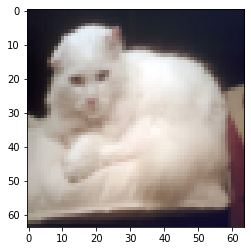

In [5]:
# Let's load one of the images
index = 13
plt.imshow(train_x_orig[index])
print("y = " + str(train_y[0, index]) + ". Is a " + classes[train_y[0, index]].decode("utf-8") + " picture.")

In [6]:
# Exploring the dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


We will reshape the dataset and standardize the dataset

<img src="images/imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>FIGURE</u>: Image to vector conversion. <br> </center></caption>

In [8]:
# Reshape the training and testing dataset

# .reshape(m, -1) reshapes vector into (m, a*b*c) basically all remaing dimensions
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have features
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)
